<a href="https://colab.research.google.com/github/aruaru0/Pycaret-samples/blob/main/pycaret_sample_regression_etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# パッケージのインストール

In [1]:
!pip install pycaret

In [2]:
!pip install scikit-learn
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [3]:
from pycaret.datasets import get_data
df = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


# Regression（回帰）

In [4]:
from pycaret.regression import *
from pycaret.datasets import get_data

## データセットをロード

In [5]:
df = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


## セットアップ

In [6]:
seed = 42
reg = setup(df, target = 'Price', session_id=seed)

,Description,Value
0,Session id,42
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


## モデル比較

In [7]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,626.5633,1802469.1135,1299.1149,0.9829,0.0668,0.0490,1.8510
xgboost,Extreme Gradient Boosting,693.4724,2091671.1893,1411.0594,0.9799,0.0718,0.0534,0.6570
et,Extra Trees Regressor,768.1046,2623394.9249,1574.0536,0.9752,0.0818,0.0603,1.7750
rf,Random Forest Regressor,759.9697,2904525.2299,1640.9687,0.9726,0.0808,0.0587,1.6210
gbr,Gradient Boosting Regressor,890.2247,3013200.5782,1712.0534,0.9711,0.1006,0.0759,0.5310
lightgbm,Light Gradient Boosting Machine,755.5459,3105329.7208,1697.2430,0.9708,0.0784,0.0568,0.6870
dt,Decision Tree Regressor,991.8946,4842797.2908,2144.3563,0.9533,0.1045,0.0761,0.1750
ridge,Ridge Regression,2450.4055,14222472.1688,3750.3548,0.8618,0.6345,0.2901,0.5250
br,Bayesian Ridge,2457.4138,14510258.4337,3787.6534,0.8590,0.6337,0.2904,0.2950
llar,Lasso Least Angle Regression,2455.2534,14527482.5156,3789.9234,0.8589,0.6392,0.2897,0.3020


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [8]:
best = compare_models(sort="RMSE", n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,626.5633,1802469.1135,1299.1149,0.9829,0.0668,0.0490,1.9530
xgboost,Extreme Gradient Boosting,693.4724,2091671.1893,1411.0594,0.9799,0.0718,0.0534,0.9130
et,Extra Trees Regressor,768.1046,2623394.9249,1574.0536,0.9752,0.0818,0.0603,1.5940
rf,Random Forest Regressor,759.9697,2904525.2299,1640.9687,0.9726,0.0808,0.0587,1.4950
lightgbm,Light Gradient Boosting Machine,755.5459,3105329.7208,1697.2430,0.9708,0.0784,0.0568,0.3740
gbr,Gradient Boosting Regressor,890.2247,3013200.5782,1712.0534,0.9711,0.1006,0.0759,0.7430
dt,Decision Tree Regressor,991.8946,4842797.2908,2144.3563,0.9533,0.1045,0.0761,0.1730
ridge,Ridge Regression,2450.4055,14222472.1688,3750.3548,0.8618,0.6345,0.2901,0.1630
br,Bayesian Ridge,2457.4138,14510258.4337,3787.6534,0.8590,0.6337,0.2904,0.2700
llar,Lasso Least Angle Regression,2455.2534,14527482.5156,3789.9234,0.8589,0.6392,0.2897,0.1690


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

## 結果の可視化

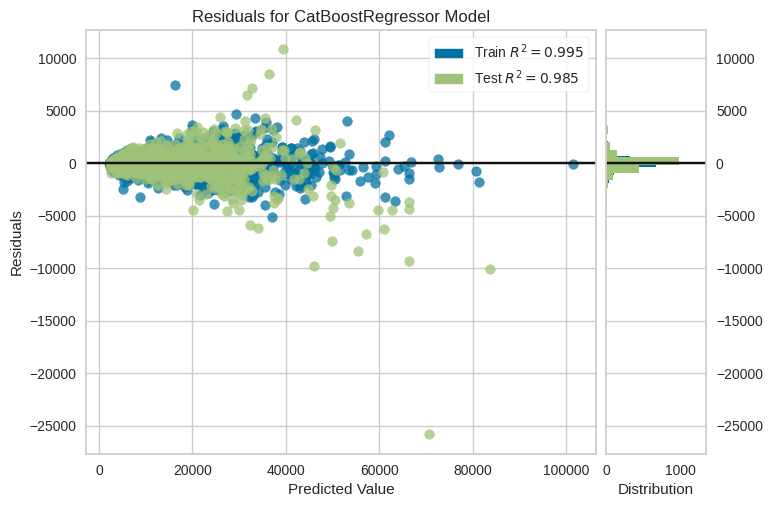

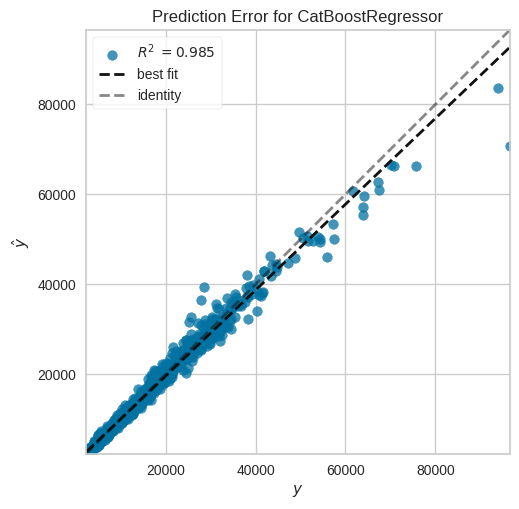

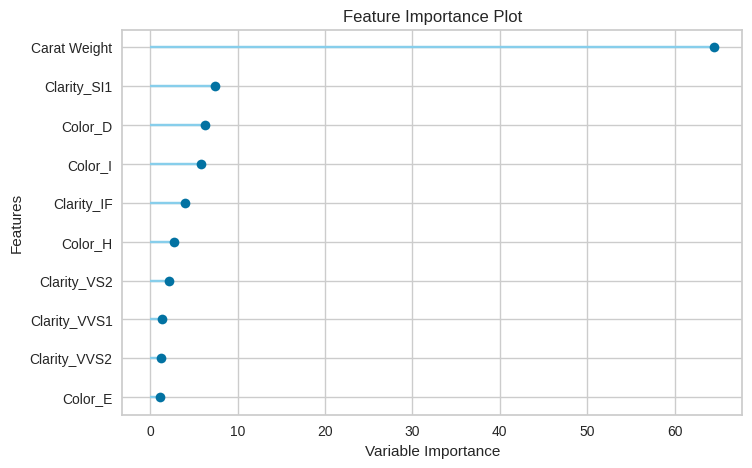

In [9]:
plot_model(best[0])
plot_model(best[0], plot="error")
plot_model(best[0], plot="feature")

## モデルをfinalizeする


In [10]:
models = finalize_model(best[0])

## SAVE/LOADのテスト

In [11]:
save_model(models, "models")
loaded = load_model("models")

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [12]:
loaded

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(in...
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                                                    'Symmetry'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7dc6243de110>)])

In [13]:
predict_model(loaded, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,433.6424,502249.1826,708.6954,0.9952,0.0537,0.0397


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,5438.520787
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,3485.715692
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3402.049870
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,4463.216117
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3365.600748
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6343.821642
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,5726.641018
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,6218.988105
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,11399.166728


# Time Series （時系列）

In [14]:
from pycaret.time_series import *
from pycaret.datasets import get_data
import pandas as pd
import numpy as np

## データセットをロード

In [15]:
data = get_data('airline')

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

<Axes: xlabel='Period'>

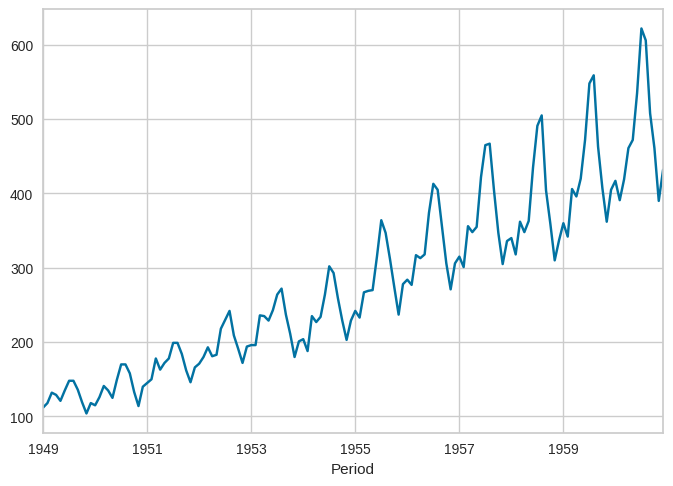

In [16]:
data.plot()

## セットアップ

In [17]:
seed = 42
ts = setup(data = data, fh = 12, session_id=seed)
# ts = setup(data = data,  fh = 12, seasonal_period = 12, session_id=seed)
# ts = setup(data = data, session_id=seed)

,Description,Value
0,session_id,42
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## モデル比較

In [18]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.5852,0.6105,17.1926,20.1633,0.0435,0.0439,0.8918,1.0633
ets,ETS,0.5931,0.6212,17.4165,20.5102,0.0440,0.0445,0.8882,0.2233
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6666,0.7255,19.6620,24.0121,0.0490,0.0489,0.8465,0.7667
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6813,0.7866,20.0334,25.9670,0.0491,0.0499,0.8113,0.4600
arima,ARIMA,0.6830,0.6735,20.0069,22.2199,0.0501,0.0507,0.8677,0.1567
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7004,0.7702,20.6084,25.4401,0.0509,0.0514,0.8215,0.6033
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7004,0.7703,20.6086,25.4405,0.0509,0.0514,0.8215,0.7933
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7029,0.7732,20.6816,25.5362,0.0511,0.0516,0.8201,0.7567
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7373,25.6005,0.0512,0.0517,0.8193,0.4400
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7366,25.6009,0.0512,0.0517,0.8192,0.4367


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [19]:
plot_model(best, plot = 'forecast')

In [20]:
pred = predict_model(best,36)
pred

,y_pred
1960-01,417.2810
1960-02,394.0567
1960-03,462.4373
1960-04,448.5887
1960-05,471.8593
1960-06,539.8763
1960-07,623.8054
1960-08,631.1408
1960-09,515.5723
1960-10,449.8958


In [21]:
 pred = pred.to_timestamp()
 prev = pd.DataFrame(data).to_timestamp()
 prev.head()

,Number of airline passengers
Period,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


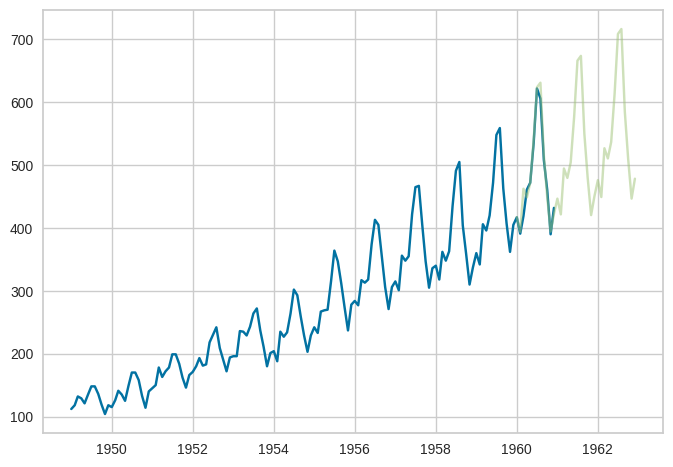

In [22]:
import matplotlib.pyplot as plt
plt.plot(prev.index, prev['Number of airline passengers'])
plt.plot(pred.index, pred.y_pred, alpha=0.5)

# Clustering（クラスタリング）

In [23]:
from pycaret.clustering import *
from pycaret.datasets import get_data

## データセットのロード

In [24]:
data = get_data('mice')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


## セットアップ

In [25]:
seed = 42
clust = setup(data, ignore_features = ['MouseID'], session_id = seed)

,Description,Value
0,Session id,42
1,Original data shape,"(1080, 82)"
2,Transformed data shape,"(1080, 88)"
3,Ignore features,1
4,Ordinal features,3
5,Numeric features,77
6,Categorical features,4
7,Rows with missing values,48.9%
8,Preprocess,True
9,Imputation type,simple


In [26]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


## Kmeansでクラスタリング

In [27]:
kmeans = create_model('kmeans')
# kmeans = create_model('kmeans', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1753,251.4496,1.7912,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## 結果をグラフで評価

In [28]:
plot_model(kmeans)

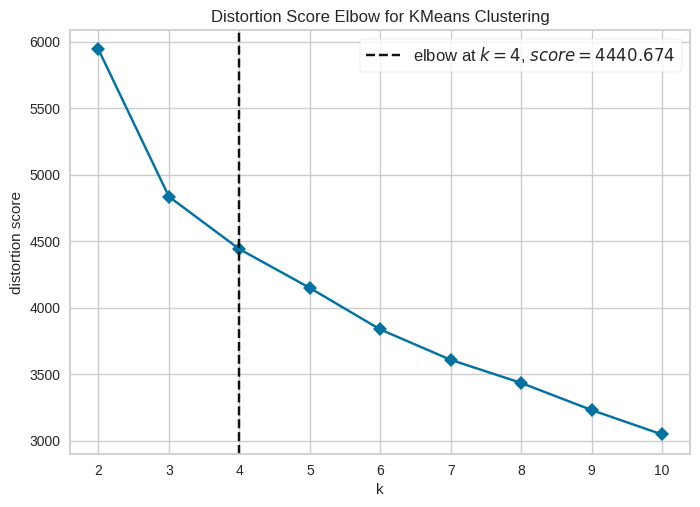

In [29]:
plot_model(kmeans, plot = 'elbow')


## 予測

In [30]:
predict_model(kmeans, data)[['Cluster']]

,Cluster
0,Cluster 2
1,Cluster 2
2,Cluster 2
3,Cluster 2
4,Cluster 2
...,...
1075,Cluster 1
1076,Cluster 1
1077,Cluster 1
1078,Cluster 1


# Anomaly Detection（異常検知）

In [31]:
from pycaret.anomaly import *
from pycaret.datasets import get_data

## データセットのロード

In [32]:
data = get_data('mice')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


## セットアップ

In [33]:
seed = 42
ano = setup(data, ignore_features = ['MouseID'], session_id = seed)

,Description,Value
0,Session id,42
1,Original data shape,"(1080, 82)"
2,Transformed data shape,"(1080, 88)"
3,Ignore features,1
4,Ordinal features,3
5,Numeric features,77
6,Categorical features,4
7,Rows with missing values,48.9%
8,Preprocess,True
9,Imputation type,simple


In [34]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


## モデルの設定

In [35]:
iforest = create_model('iforest')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## データを分析

In [36]:
iforest_results = assign_model(iforest)
iforest_results.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Anomaly,Anomaly_Score
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,0,-0.064560
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m,0,-0.083990
2,0.509183,0.730247,0.418309,2.687201,5.622058,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m,0,-0.075859
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,0,-0.101371
4,0.434940,0.617430,0.358802,2.365785,4.718678,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m,0,-0.098348


In [37]:
plot_model(iforest)

## 予測

In [38]:
pred = predict_model(iforest, data=data.drop(columns=['MouseID']))

In [39]:
pred[pred['Anomaly'] == 1]

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,class_c-CS-m,class_c-SC-m,class_c-CS-s,class_c-SC-s,class_t-CS-m,class_t-SC-m,class_t-CS-s,class_t-SC-s,Anomaly,Anomaly_Score
25,0.538413,0.701865,0.384445,2.482137,4.109706,0.288018,0.223206,2.082833,0.202023,1.965223,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.023995
30,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.012942
31,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.022400
32,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.034857
87,0.367629,0.504473,0.261285,1.892843,3.061814,0.216348,0.165514,2.479870,0.135218,1.034974,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.050477
88,0.378987,0.465510,0.261164,1.900917,3.016348,0.212719,0.176834,2.523923,0.137959,1.015750,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.044582
89,0.373648,0.471165,0.257909,1.860032,2.938526,0.218262,0.150380,2.610132,0.142571,1.020024,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.014962
192,0.145327,0.245359,0.185980,1.403329,2.290973,0.164693,0.122759,3.085787,0.127401,0.856114,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.027006
220,0.264324,0.416904,0.324470,2.079139,3.182336,0.327952,0.245964,4.654004,0.285533,1.407407,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000417
222,0.254839,0.370968,0.397491,1.987455,2.979570,0.321147,0.274194,4.501075,0.292473,1.479928,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.032989


## 他の予測方法を試す

In [40]:
knn = create_model('knn')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [41]:
result = assign_model(knn)
result.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Anomaly,Anomaly_Score
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,0,1.470182
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m,0,1.403804
2,0.509183,0.730247,0.418309,2.687201,5.622058,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m,0,1.391104
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,0,1.225146
4,0.434940,0.617430,0.358802,2.365785,4.718678,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m,0,1.111840


In [42]:
plot_model(knn)